In [32]:
import pandas as pd

In [33]:

df = pd.read_csv('sab-bma.csv')


In [34]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCATACGCGGCTC...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACAAATAGGTTGGTCCTCCGTTCTATCTA...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAAACCCCACGCAGGAGCTCTAGGATACCCACCTGCAAGAGGT...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAAGCGTG...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCATGTTTTG...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAATTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTCTCTAATA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGCACCGCATTCCCAATT...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGCATAATGAAACGACAACCTGTCTTGACT...


In [35]:
from tqdm import tqdm


In [36]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [37]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [38]:
import difflib


In [39]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


100%|██████████| 10000/10000 [00:00<00:00, 50251.23it/s]


[88, 268, 416, 606, 785, 987, 1159, 1331, 1516, 1702, 1849, 2061, 2232, 2307, 2527, 2613, 2764, 2915, 3058, 3160, 3285, 3397, 3505, 3608, 3680, 3872, 3943, 3986, 4139, 4218, 4297, 4292, 4478, 4518, 4565, 4617, 4707, 4668, 4789, 4948, 4949, 5008, 5118, 5087, 5252, 5151, 5207, 5213, 5236, 5395, 5384, 5360, 5303, 5548, 5448, 5566, 5473, 5473, 5411, 5366, 5482, 5239, 5272, 5213, 5140, 5092, 5021, 4958, 4972, 4942, 4911, 4815, 4771, 4738, 4580, 4497, 4435, 4401, 4337, 4168, 4194, 4037, 3976, 3869, 3779, 3669, 3564, 3507, 3368, 3204, 3103, 2963, 2838, 2739, 2612, 2477, 2333, 2179, 2040, 1810, 1618, 1543, 1314, 1139, 958, 770, 574, 378, 213, 48, 0]


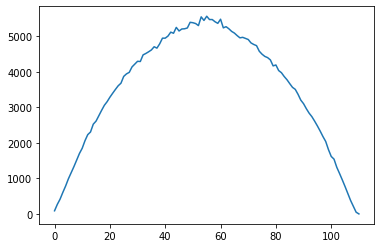

In [54]:
pairs = []
pairs_no_pos = []

strand_len = 110
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)


In [41]:
import numpy as np


In [42]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [43]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

 -> GGAG 6
 -> GGAC 6
TG -> AAC 6
 -> GACC 6
 -> AGAGA 6
 -> AGGA 6
T -> AACA 6
 -> CAAG 6
G -> ACCC 6
TCCT ->  6
 -> GCCA 6
 -> AGCG 6
G -> CAAA 6
CCTA ->  6
 -> ATCA 6
 -> GATG 6
TGAC ->  6
T -> ACAC 6
GGGT ->  6
 -> ATAC 6
G -> TAA 6
C -> AGT 6
T -> ACC 6
TCTT ->  6
GGTA ->  6
CC -> GA 6
CC -> T 6
GGT -> C 6
TC -> AAA 6
 -> CAAC 6
CT -> GG 6
 -> TCAC 6
 -> CGAC 6
AGCT ->  6
GCCT ->  6
 -> AACT 6
 -> CGGC 6
TTGT ->  6
AT -> GC 6
TTGA ->  6
GG -> TA 6
AG -> CC 6
 -> ACACA 6
 -> CCAG 6
 -> CGCC 6
AGT -> C 6
TAG -> C 6
 -> AAAT 6
 -> TATA 6
TTGG ->  6
 -> CCGG 6
ACA ->  6
TGCG ->  6
ATT -> G 6
 -> TACA 6
CTAT ->  6
 -> ACGG 6
 -> CCTA 6
T -> AGAC 6
 -> ACTC 6
CGGT ->  6
T -> GCC 6
T -> GAG 6
TC -> GG 6
GAGT ->  6
 -> AAGG 7
 -> AATC 7
CTTG ->  7
 -> AGAC 7
 -> AATA 7
G -> CACA 7
TGAA ->  7
AATT ->  7
 -> AAGC 7
TGG -> C 7
 -> GATA 7
CT -> AAA 7
 -> CCCC 7
TCTG ->  7
GCGT ->  7
 -> CCGA 7
GTTG ->  7
 -> CTAC 7
TGTT ->  7
TATT ->  7
TAGG ->  7
 -> ACGC 7
 -> CAGA 7
TG -> CAC 7
CTGC ->  7


In [44]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [45]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


G -> AA @ 56 6
AG ->  @ 56 6
CT ->  @ 48 6
GA ->  @ 39 6
C -> G @ 20 6
T -> AC @ 60 6
 -> GC @ 48 6
TT ->  @ 59 6
 -> AAC @ 54 6
 -> GC @ 59 6
CT ->  @ 33 6
GA ->  @ 56 6
A -> C @ 40 6
C -> G @ 76 6
C -> G @ 75 6
A -> C @ 37 6
 -> AA @ 61 6
A -> C @ 33 6
TT -> C @ 57 6
AT ->  @ 80 6
G -> A @ 109 6
 -> AA @ 39 6
GC ->  @ 61 6
GT ->  @ 91 6
T -> AA @ 22 6
 -> CA @ 52 6
TT ->  @ 62 6
A -> C @ 26 6
C -> G @ 71 6
A -> C @ 24 6
 -> AT @ 50 6
 -> GC @ 58 6
A -> C @ 27 6
AT ->  @ 99 6
GT ->  @ 27 6
 -> GA @ 64 6
CT ->  @ 72 6
CT ->  @ 73 6
C -> G @ 31 6
G -> T @ 62 6
CT ->  @ 77 6
G -> T @ 88 6
AG ->  @ 62 6
G -> T @ 63 6
 -> ACA @ 53 6
A -> C @ 41 6
CT ->  @ 22 6
 -> GA @ 50 6
 -> CA @ 21 6
C -> T @ 96 6
AG ->  @ 82 6
TT ->  @ 67 6
G -> T @ 67 6
AC ->  @ 57 6
C -> G @ 42 6
GT ->  @ 19 6
G -> T @ 69 6
C -> G @ 45 6
 -> ACC @ 56 6
 -> GG @ 58 6
GT ->  @ 12 6
GT ->  @ 25 6
GT ->  @ 26 6
C -> G @ 60 6
G -> T @ 52 6
T -> AA @ 46 6
G -> T @ 54 6
G -> T @ 55 6
 -> AG @ 58 6
C -> G @ 57 6
CT ->  @ 61

In [46]:
import matplotlib.pyplot as plt

In [47]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[85, 206, 275, 285, 310, 370, 367, 440, 423, 430, 436, 445, 514, 539, 527, 548, 549, 580, 586, 614, 616, 565, 622, 638, 660, 670, 691, 707, 687, 735, 748, 732, 812, 723, 768, 806, 743, 759, 794, 804, 861, 829, 834, 843, 840, 855, 849, 863, 862, 866, 957, 994, 1068, 1333, 1741, 2249, 1950, 1550, 1183, 1031, 901, 883, 864, 872, 840, 849, 857, 854, 754, 860, 807, 837, 835, 801, 756, 797, 723, 747, 699, 762, 740, 700, 708, 725, 711, 711, 680, 640, 641, 608, 614, 589, 602, 550, 544, 557, 554, 532, 536, 553, 452, 420, 455, 417, 407, 368, 330, 339, 318, 235, 227]


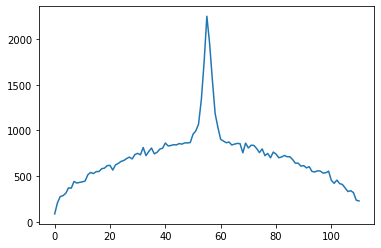

In [48]:
plt.plot(range(strand_len + 1), pos_counts)

In [49]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[7, 7, 4, 10, 7, 16, 8, 16, 16, 14, 15, 11, 26, 18, 16, 20, 16, 20, 21, 17, 24, 16, 16, 23, 20, 18, 23, 19, 18, 21, 23, 17, 15, 16, 23, 27, 16, 21, 25, 12, 25, 27, 26, 19, 20, 14, 25, 22, 20, 26, 27, 26, 34, 45, 87, 129, 88, 49, 25, 28, 27, 14, 20, 28, 28, 24, 16, 22, 19, 18, 16, 20, 25, 24, 26, 18, 18, 17, 16, 13, 24, 25, 20, 18, 19, 19, 15, 19, 15, 15, 12, 13, 15, 16, 12, 18, 13, 23, 13, 9, 14, 7, 12, 19, 12, 10, 13, 9, 6, 11, 2]


In [50]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


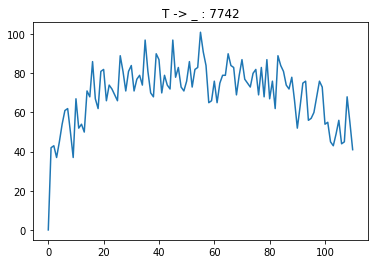

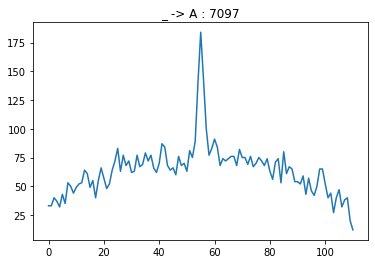

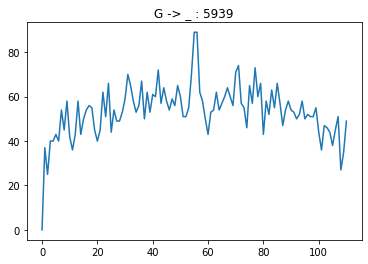

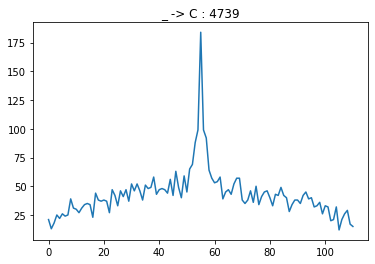

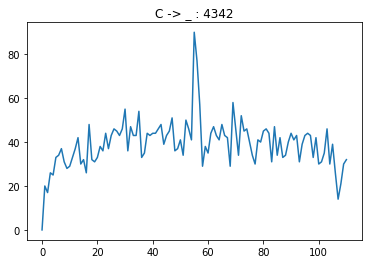

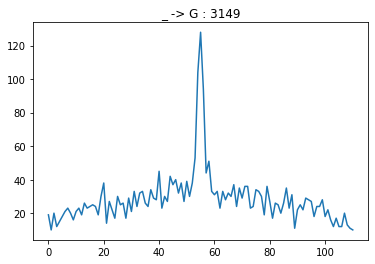

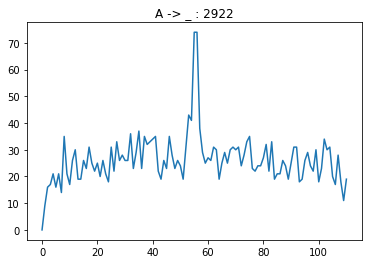

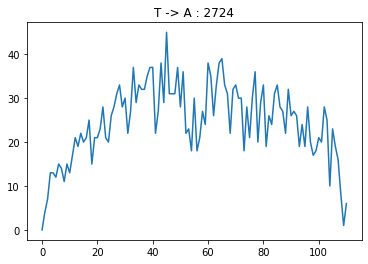

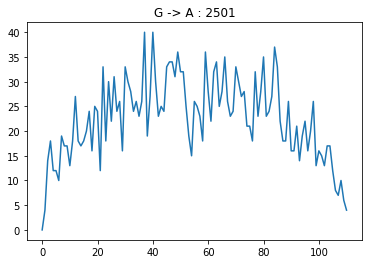

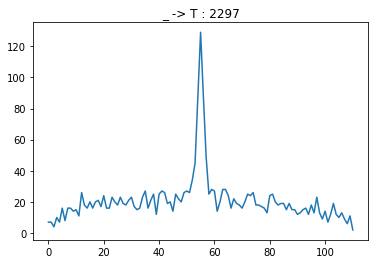

In [51]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [52]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)